In [34]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv(r"C:\Users\Shiva\Downloads\credit_card.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
df.shape

(8950, 18)

In [6]:
df.size

161100

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})

print(missing_data)

                                  Missing Values  Percentage
CUST_ID                                        0    0.000000
BALANCE                                        0    0.000000
BALANCE_FREQUENCY                              0    0.000000
PURCHASES                                      0    0.000000
ONEOFF_PURCHASES                               0    0.000000
INSTALLMENTS_PURCHASES                         0    0.000000
CASH_ADVANCE                                   0    0.000000
PURCHASES_FREQUENCY                            0    0.000000
ONEOFF_PURCHASES_FREQUENCY                     0    0.000000
PURCHASES_INSTALLMENTS_FREQUENCY               0    0.000000
CASH_ADVANCE_FREQUENCY                         0    0.000000
CASH_ADVANCE_TRX                               0    0.000000
PURCHASES_TRX                                  0    0.000000
CREDIT_LIMIT                                   1    0.011173
PAYMENTS                                       0    0.000000
MINIMUM_PAYMENTS        

In [11]:
data=df.copy()

In [12]:
data = data.drop(columns = ['CUST_ID'])

In [13]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
data.fillna(data.mean(), inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

# There are no categorical data present in the dataset

C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3837350713.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3837350713.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3837350713.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3837350713.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3837350713.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3837350713.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3837350713.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppDa

<function matplotlib.pyplot.show(close=None, block=None)>

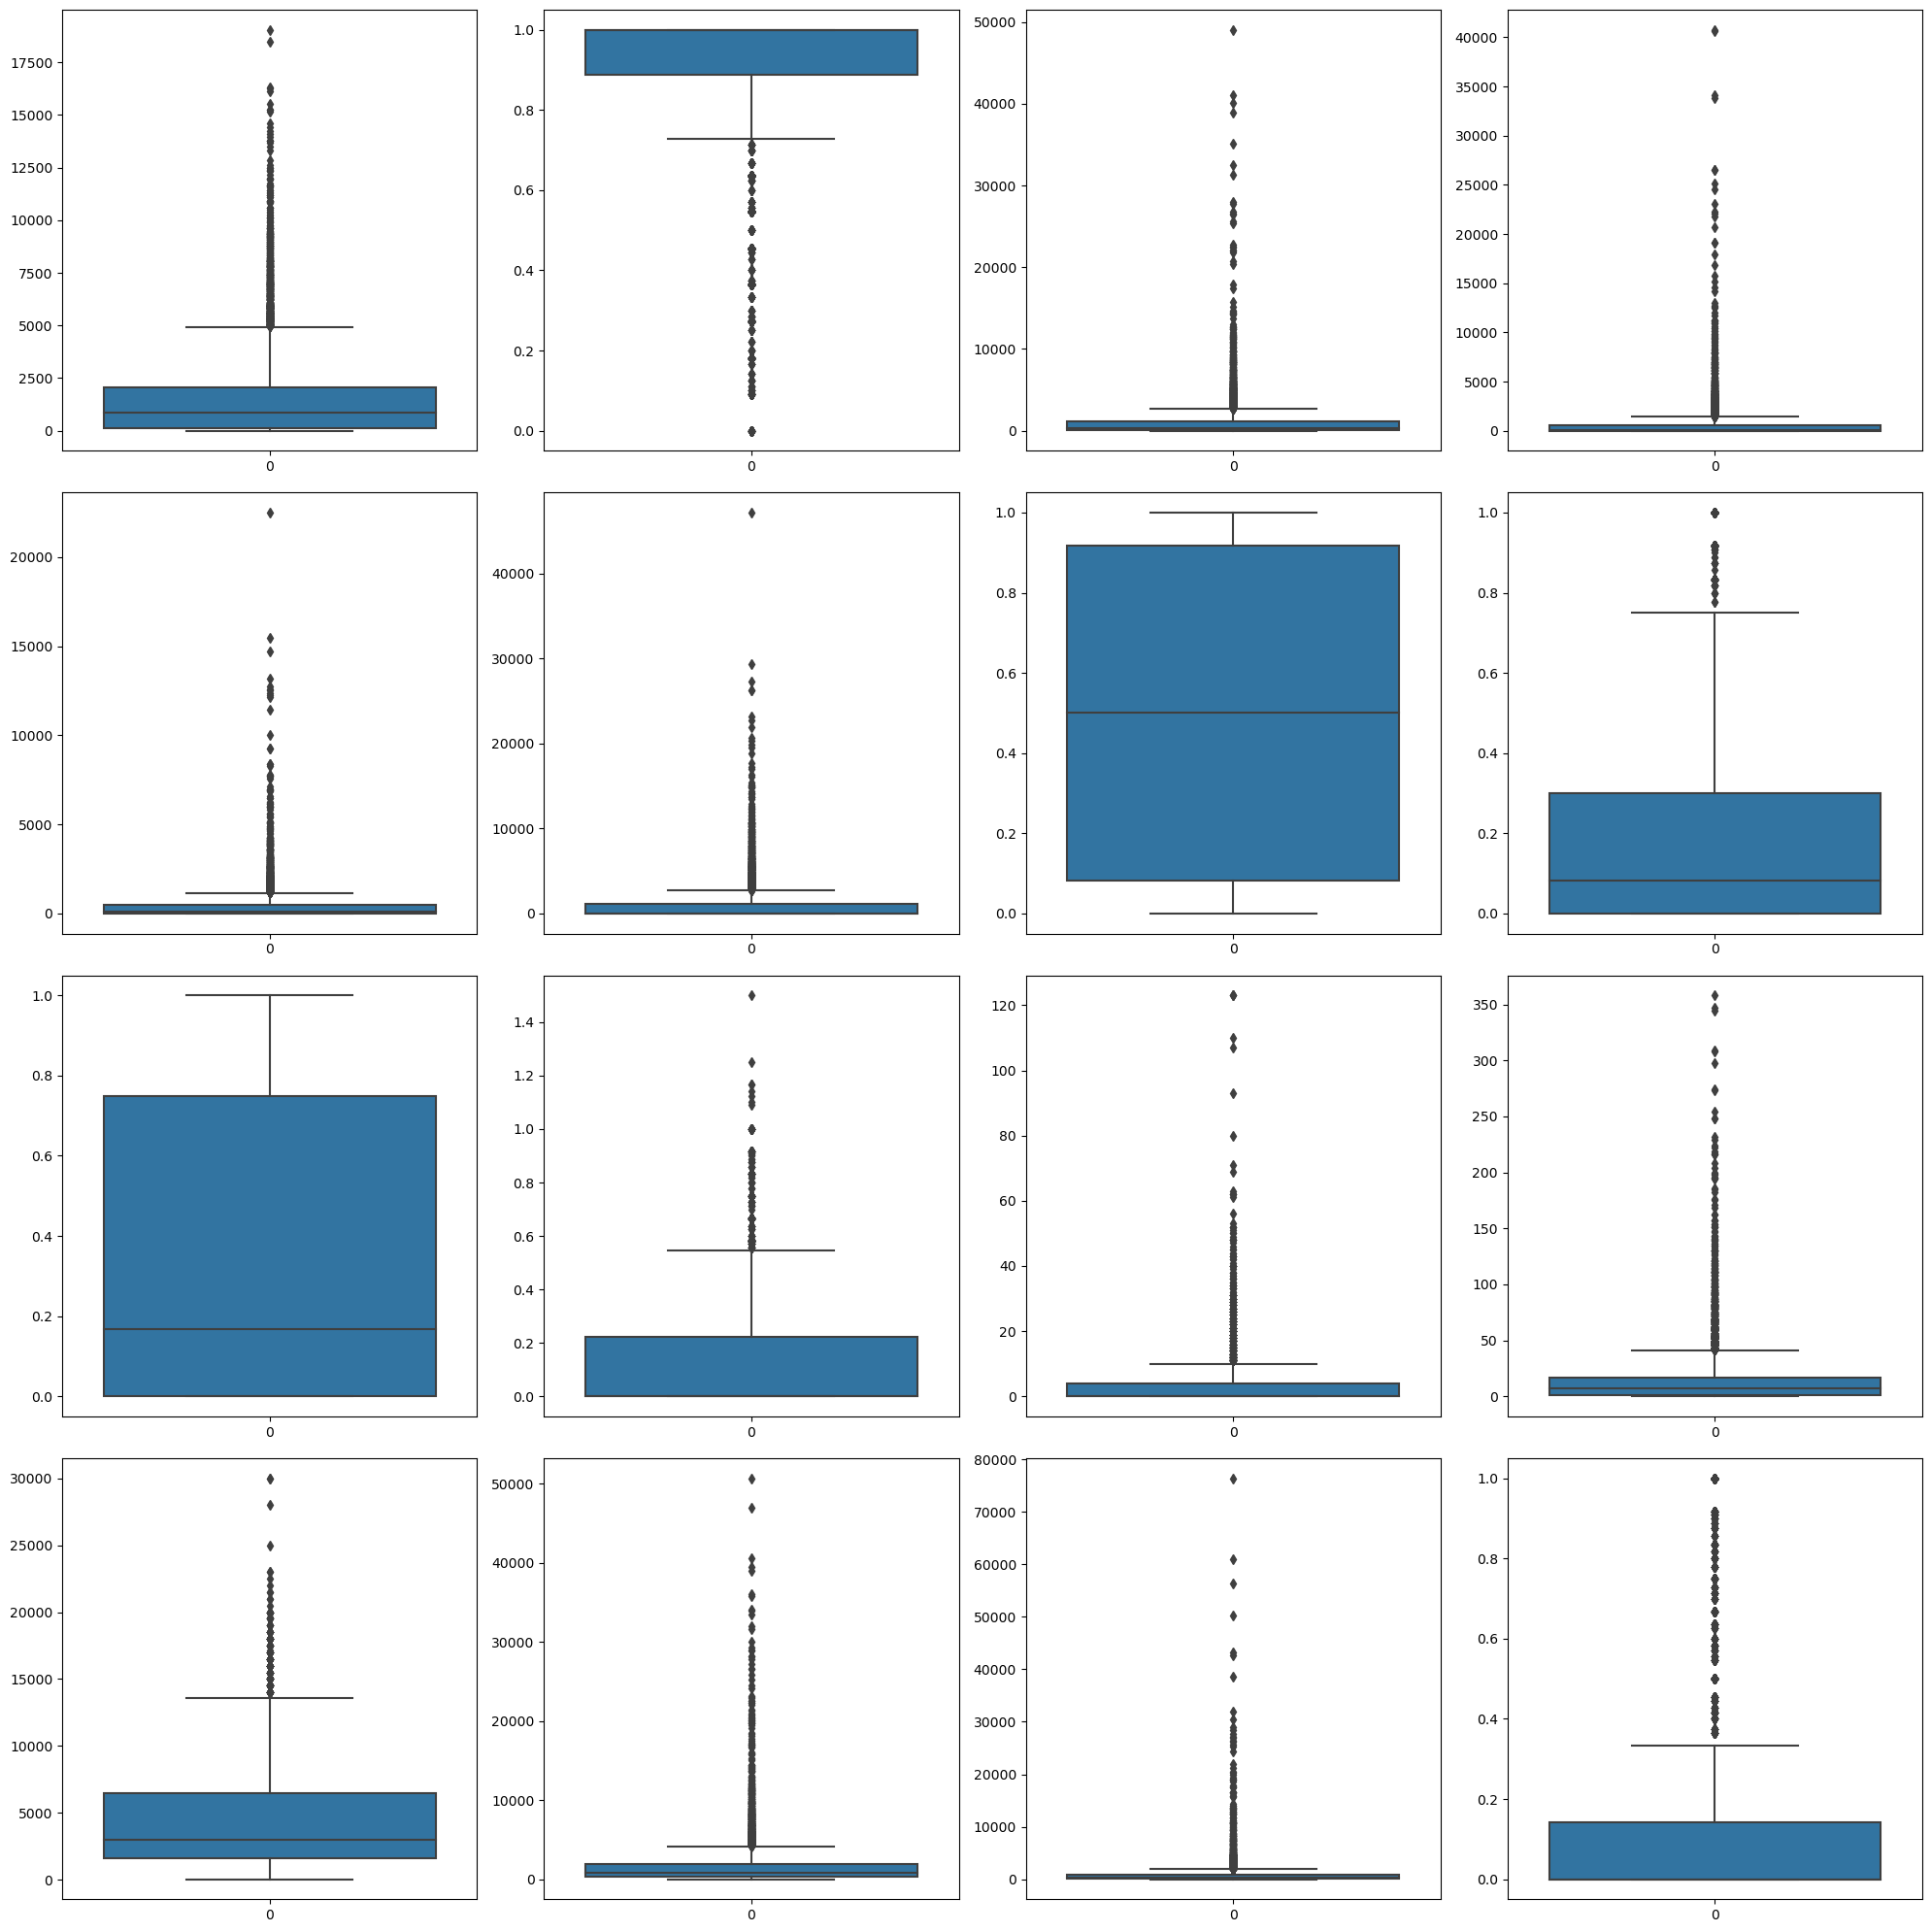

In [16]:
plt.subplots(nrows=4, ncols=4, figsize=(20,20))

for i in range (len(data.columns)-1):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data[data.columns[i]])
    plt.tight_layout()
plt.show

In [17]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data> (Q3 + 1.5 * IQR))).any(axis=1)
data = data[~outliers]

C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3900269548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3900269548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3900269548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3900269548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3900269548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3900269548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppData\Local\Temp\ipykernel_32332\3900269548.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Shiva\AppDa

<function matplotlib.pyplot.show(close=None, block=None)>

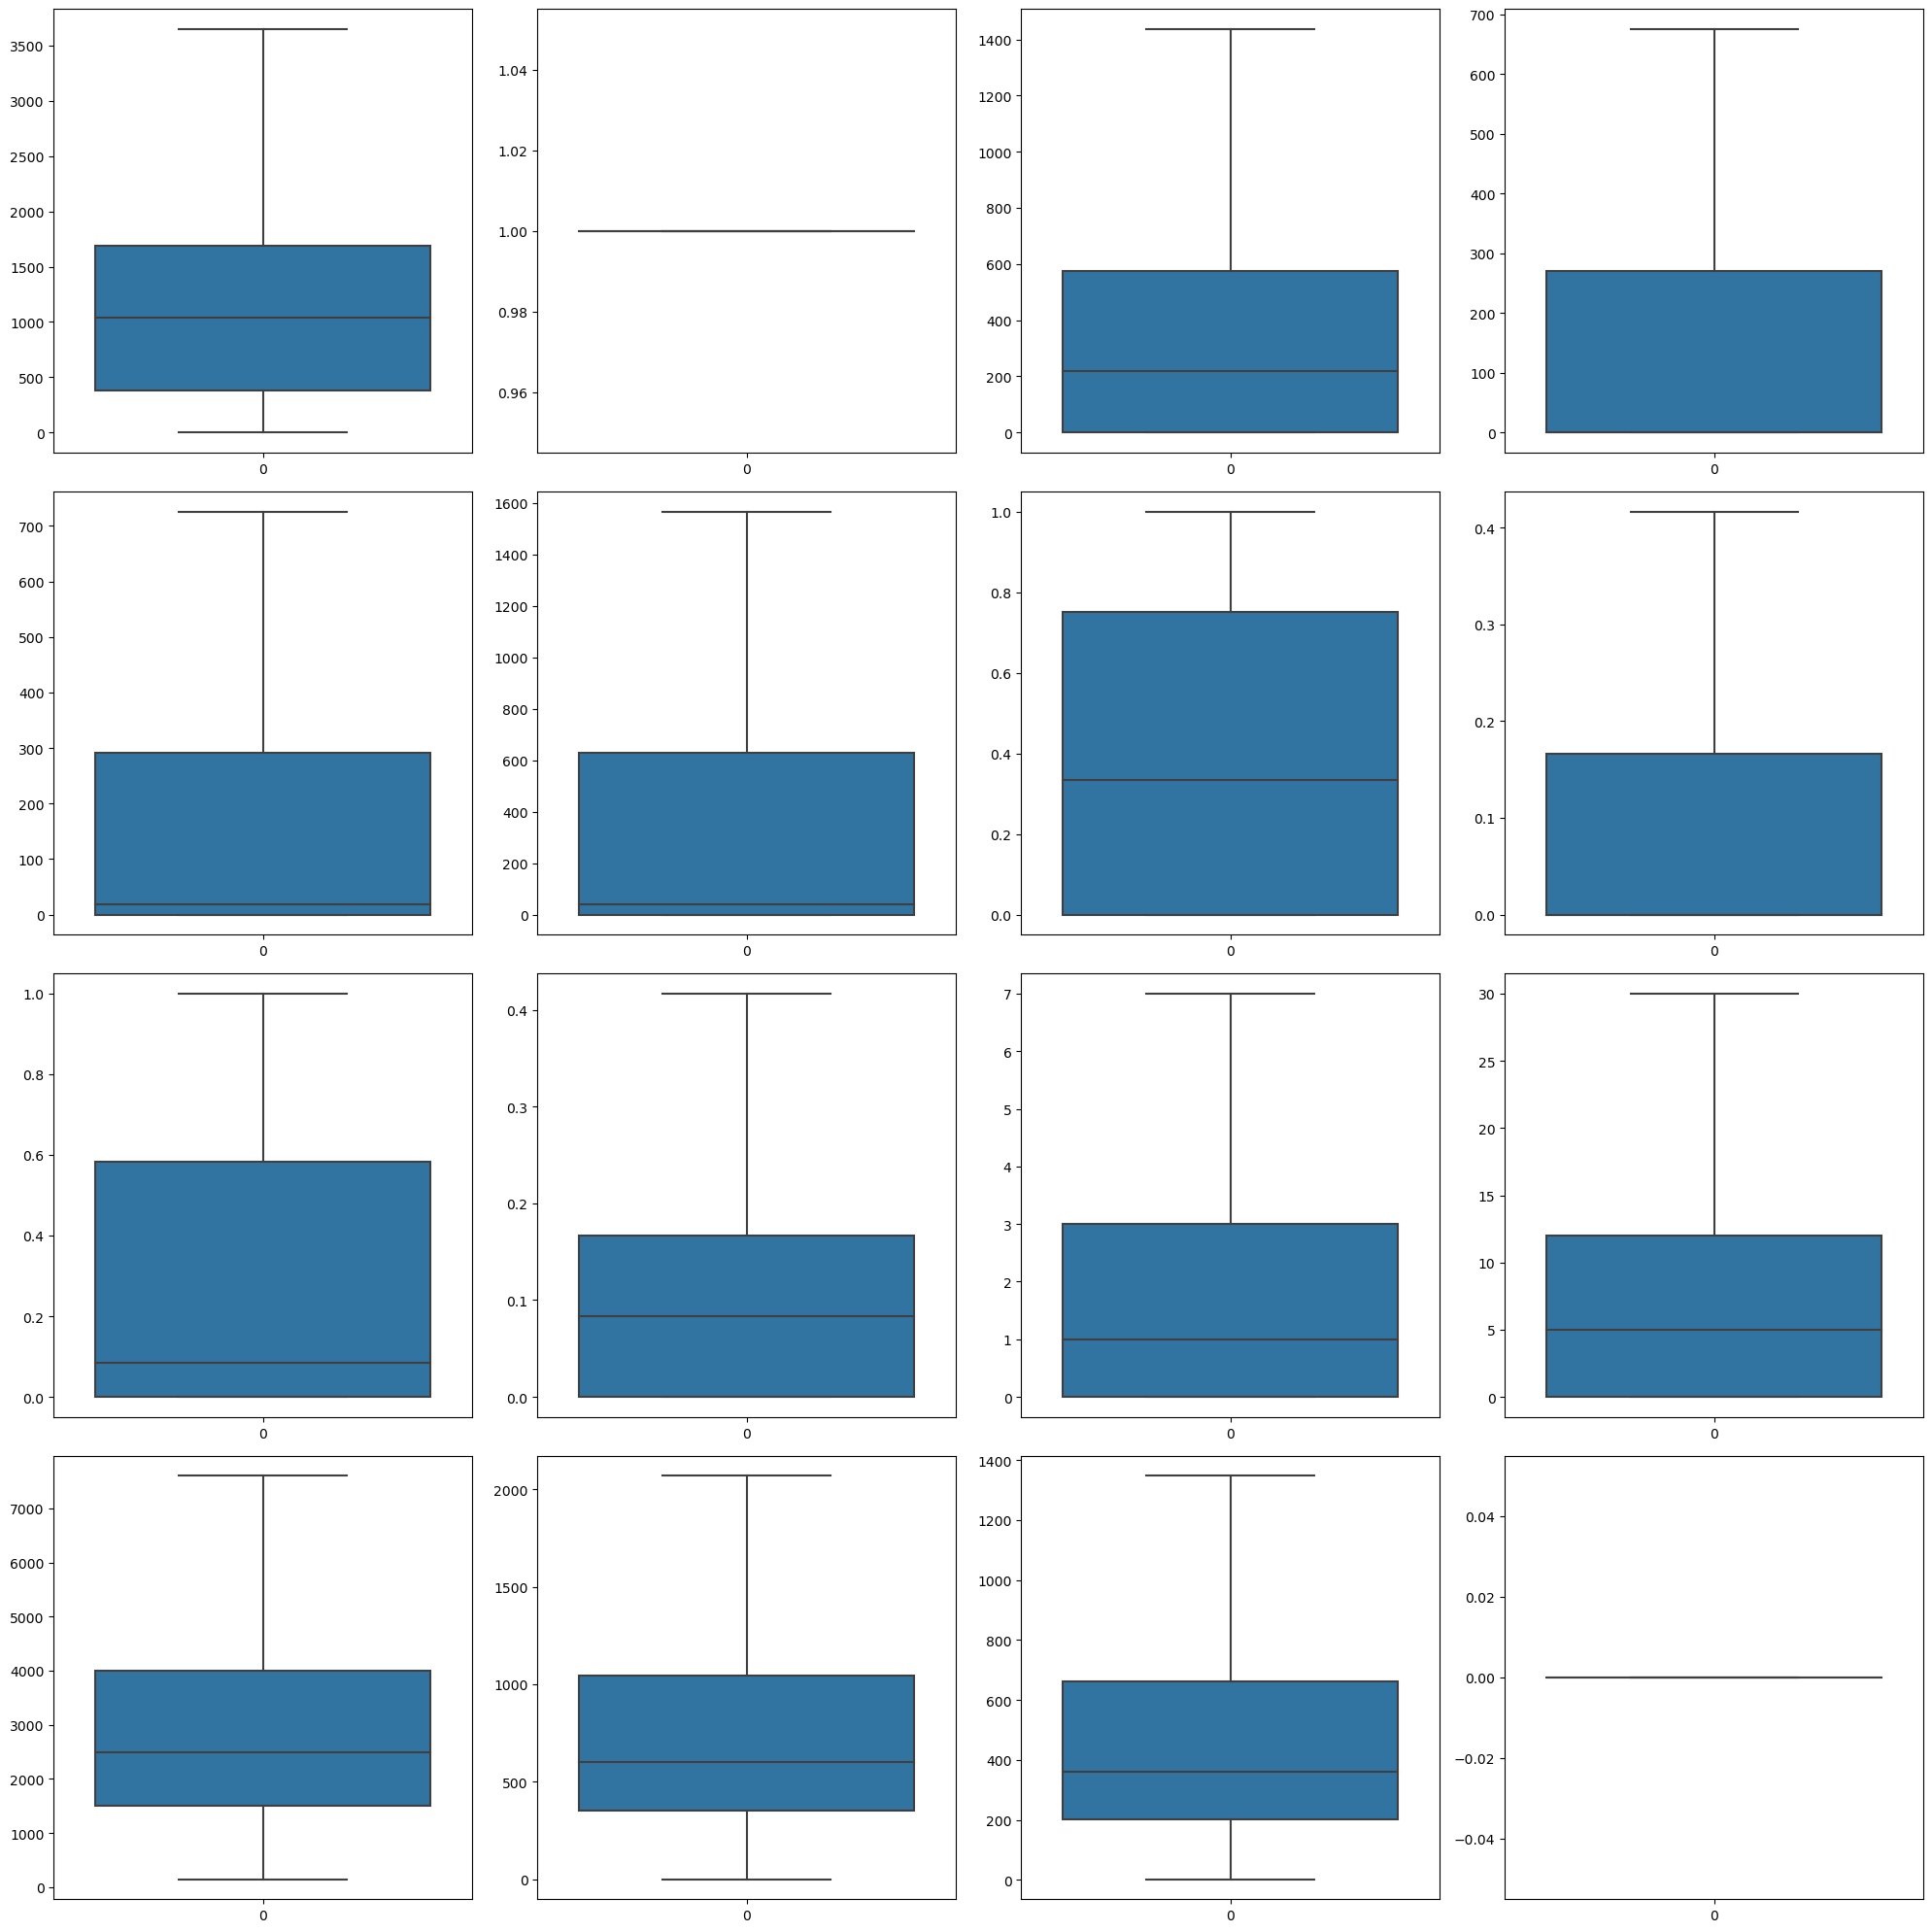

In [18]:
plt.subplots(nrows=4, ncols=4, figsize=(20,20))

for i in range (len(data.columns)-1):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data[data.columns[i]], showfliers=False)
    plt.tight_layout()
plt.show

In [19]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for each value in the numerical columns
z_scores = data[numerical_columns].apply(zscore)

# Define a threshold for Z-scores to identify outliers (commonly 3)
threshold = 4

# Identify rows with outliers in any numerical column
outliers = (z_scores > threshold) | (z_scores < -threshold)

In [20]:
outliers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8742,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8747,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
8759,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
datan = data.copy()
for col in numerical_columns:
    mean_value = datan[col].median()
    datan.loc[z_scores[col] > threshold, col] = mean_value
    datan.loc[z_scores[col] < -threshold, col] = mean_value

In [23]:
datan

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.0,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.0,12
14,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,981.286008,1.000000,1370.00,1370.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1400.0,596.685481,451.584847,0.0,12
8742,87.026009,1.000000,605.52,0.00,605.52,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1500.0,511.637312,175.012705,0.0,12
8747,16.428326,0.909091,441.50,124.70,316.80,0.000000,1.000000,0.166667,0.916667,0.000000,0,14,1000.0,482.547848,91.328536,0.0,12
8759,67.377243,1.000000,295.00,0.00,295.00,0.000000,0.500000,0.000000,0.416667,0.000000,0,6,1000.0,245.689379,167.126034,0.3,12


In [24]:
# Select numerical columns
numerical_columns = datan.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for each value in the numerical columns
z_scores = datan[numerical_columns].apply(zscore)

# Define a threshold for Z-scores to identify outliers (commonly 3)
threshold =4

# Identify rows with outliers in any numerical column
outliersn = (z_scores > threshold) | (z_scores < -threshold)

In [25]:
outliersn

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8738,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8742,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8747,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8759,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


# Outliers has been removed

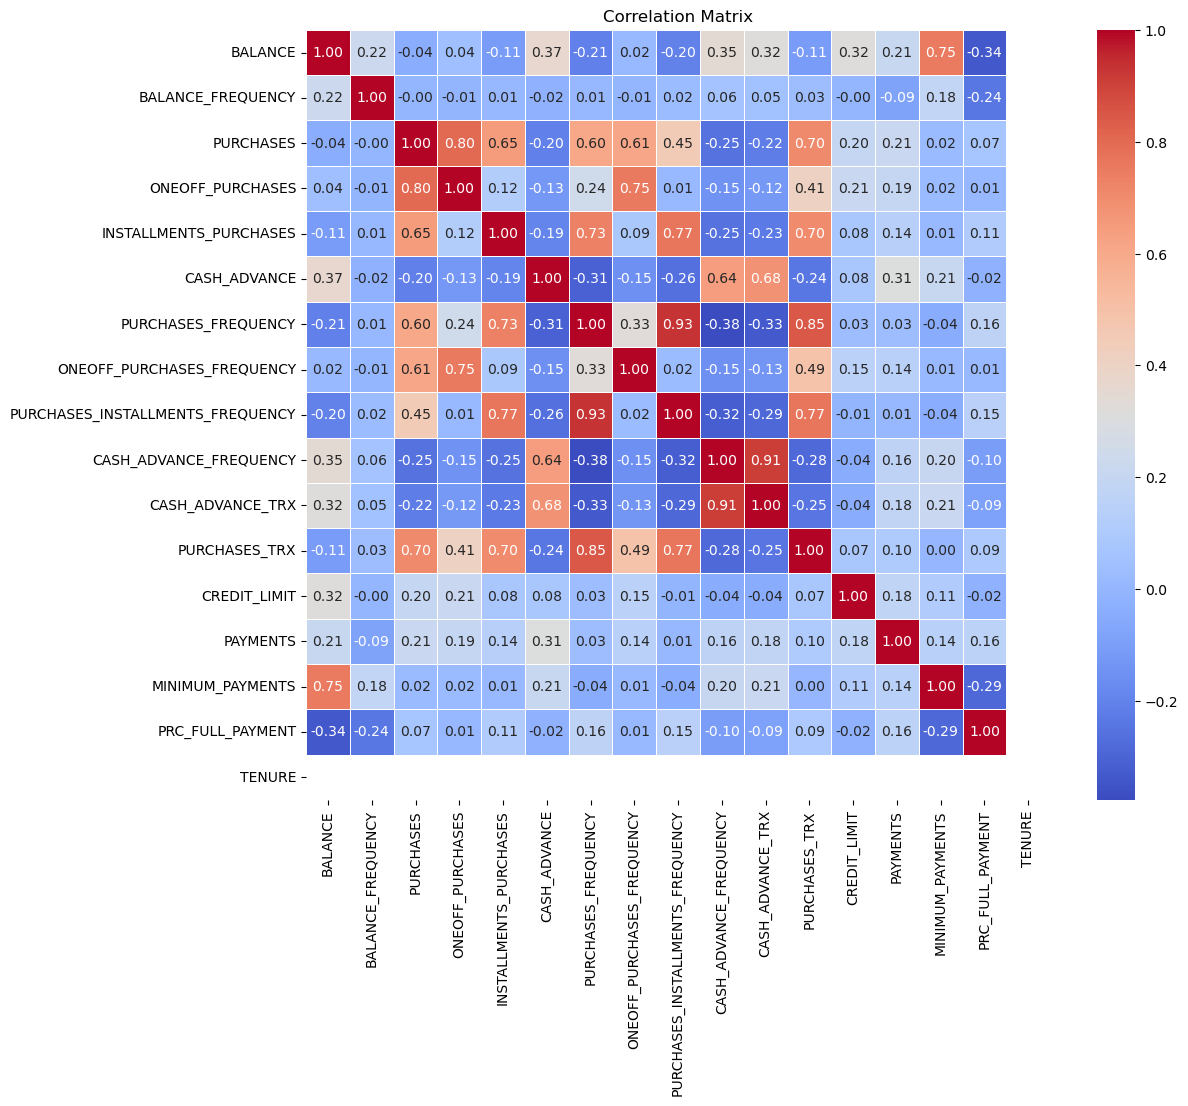

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(datan.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Scaling Data
df_scaled = pd.DataFrame(StandardScaler().fit_transform(datan))

# Applying PCA
PCA =  PCA(
    n_components = 2,
    random_state = 42
)
PCA.fit(df_scaled)

In [27]:
numerical_data = datan.select_dtypes(include=['float64', 'int64'])

# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data)

In [28]:
# Step 2: Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)  # Specify 95% of variance
data_pca = pca.fit_transform(data_scaled)

In [29]:
explained_variance = pca.explained_variance_ratio_.sum()
n_components = pca.n_components_

print(f"Number of components to explain 95% variance: {n_components}")
print(f"Total explained variance: {explained_variance:.2f}")

Number of components to explain 95% variance: 10
Total explained variance: 0.96


# Retaining 95% of the variance ensures that most of the original information in the data is preserved while reducing the dimensionality, which can help improve model performance and reduce computational costs.

C:\Users\Shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\Shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

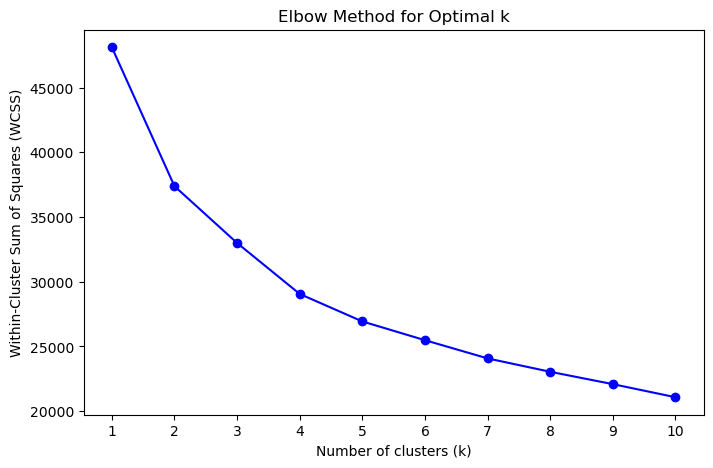

In [33]:
wcss = []
k_values = range(1, 11)  # Check k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()

# The optimal value of  k based on the Elbow Method would be either 3 or 4, as this is where the elbow (sharp bend) occurs. Both values can be reasonable choices, but you may prefer  k=4 if the additional clustering detail is helpful for your analysis, or k=3 if you prefer a simpler model.

C:\Users\Shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\Shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

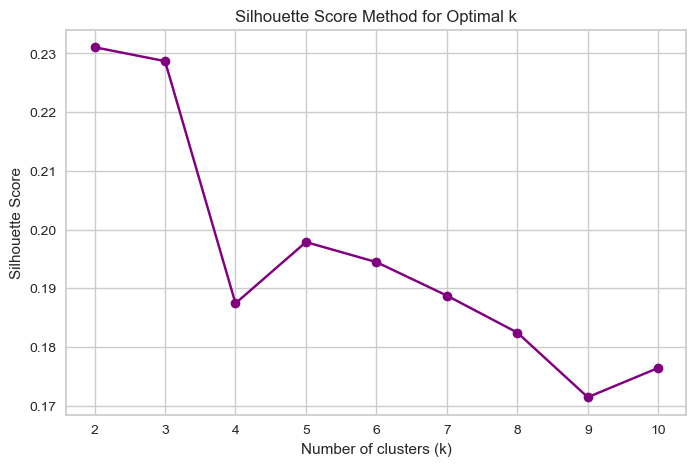

In [39]:
# Step 1: Calculate silhouette scores for different values of k
silhouette_scores = []
k_values = range(2, 11)  # Start from k=2 as silhouette score requires at least 2 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the silhouette scores to find the optimal k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='purple')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal k')
plt.xticks(k_values)
plt.show()



In [40]:
# Step 2: Choose the optimal k based on highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters (k) based on Silhouette Score:", optimal_k)


Optimal number of clusters (k) based on Silhouette Score: 2


In [41]:
# Step 3: Build K-Means model with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans_optimal.fit_predict(data_scaled)

C:\Users\Shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(


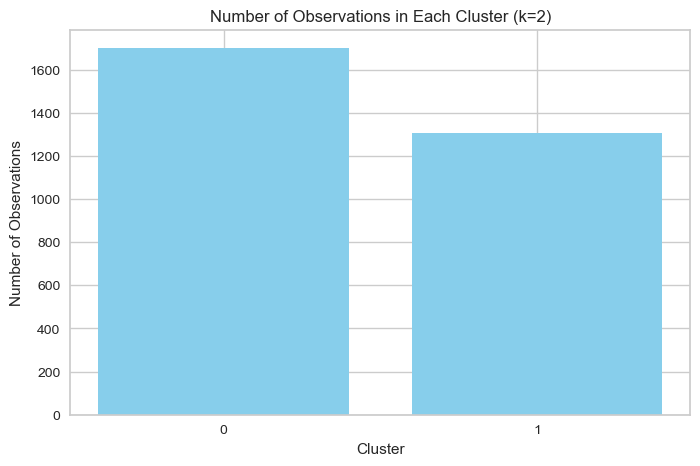

In [43]:
# Step 5: Plot number of observations in each cluster using a bar plot
import numpy as np
unique, counts = np.unique(cluster_labels, return_counts=True)
plt.figure(figsize=(8, 5))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.title(f'Number of Observations in Each Cluster (k={optimal_k})')
plt.xticks(unique)
plt.show()

# This bar plot shows the number of observations in each cluster after performing K-means clustering with  k=2. Cluster 0 has a higher number of observations, approximately 1600, while Cluster 1 has fewer, around 1400. This distribution suggests that the data naturally divides into two groups, but with an uneven number of observations per cluster.
# Since we used the silhouette score to determine that 𝑘=2 was optimal, this clustering indicates that the data's inherent structure might best be represented by two distinct clusters.